In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Grid

In [12]:
n, m = 20,20  # number of rows and columns respectively.

obstacles = [[2.725, -0.00000027, 4, 1, -40],
             [7.425, 4.725, 4, 1, 0],
             [-1.025, -1.5, 4, 1, 0],
             [-6.7, 6.4, 4, 1, 0],
             [-5.15, -6.2, 4, 1, 150],
             [2.425, 4.075, 1, 1, 0],
             [4.4, 0.875, 1, 1, 0],
             [2.825, -4.85, 1, 1, 0],
             [-0.525, 6.3, 1, 1, 0],
             [-5.125, 3.425, 1, 1, 0],
             [-1.775, 2.1, 1, 1, 0],
             [-5.8, -0.975, 1, 1, 0],
             [7.275, -7.75, 1, 1, 0]
              ]

In [205]:
# Create a matrix to represent the cells of the grid
grid = np.zeros((n, m))

for obs in obstacles:
    if not obs[4]:
        for i in range(math.floor(obs[0] - (obs[2]+1)/2)+10, math.ceil(obs[0] + (obs[2]+1)/2)+10, 1):
            for j in range(math.floor(obs[1] - (obs[3]+1)/2)+10, math.ceil(obs[1] + (obs[3]+1)/2)+10, 1):
                grid[j][i] = 1
    else:
        diag = sqrt(square(obs[2]+1) + square(obs[3]+1))
        for i in range(math.floor(obs[0] - diag/2)+10, math.ceil(obs[0] + diag/2)+10, 1):
            for j in range(math.floor(obs[1] - diag/2)+10, math.ceil(obs[1] + diag/2)+10, 1):
                grid[j][i] = 1
                
grid[1][2] = 0
grid[1][3] = 0
grid[1][4] = 0
grid[1][5] = 0
grid[2][2] = 0
grid[2][3] = 0
grid[12][15] = 0
grid[12][14] = 0
grid[12][13] = 0
grid[4][7] = 0
grid[5][7] = 0
grid[6][2] = 0
grid[6][3] = 0
grid[6][4] = 0
grid[6][5] = 0
grid[6][6] = 0
grid[6][7] = 0
grid[5][5] = 0
grid[5][6] = 0

In [207]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(n, m) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(n):
    for j in range(m):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))
# print("Nodes:", G.nodes())

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  236


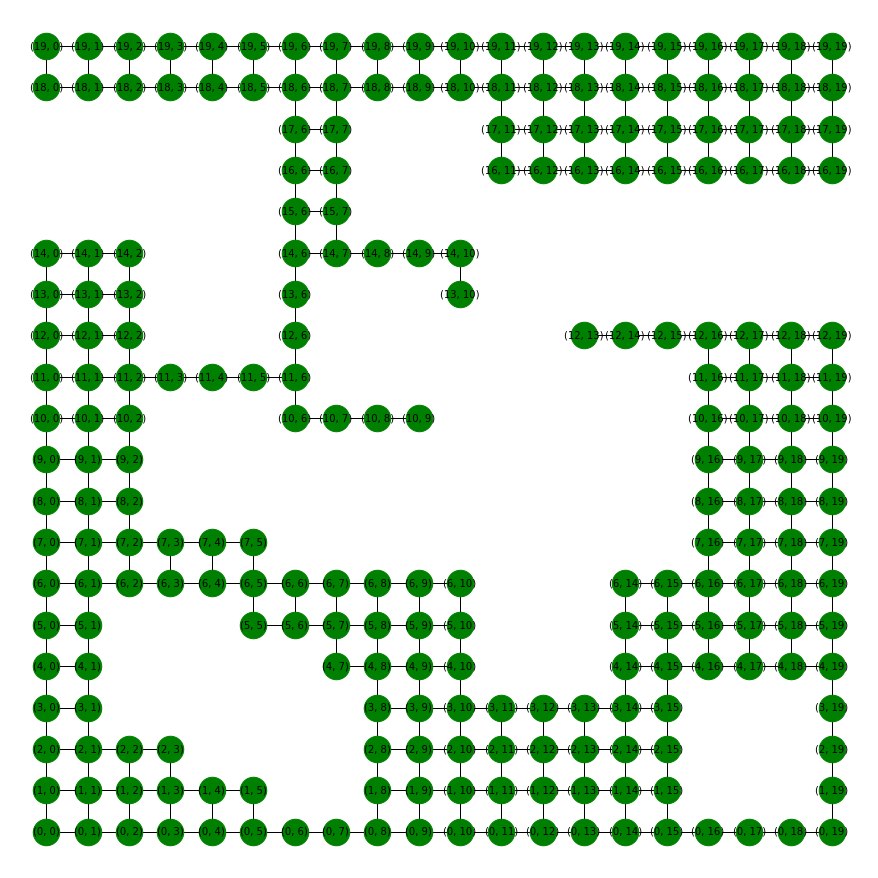

In [208]:
# Position of the nodes
figure(1,figsize=(12,12))
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=700, node_color="g")

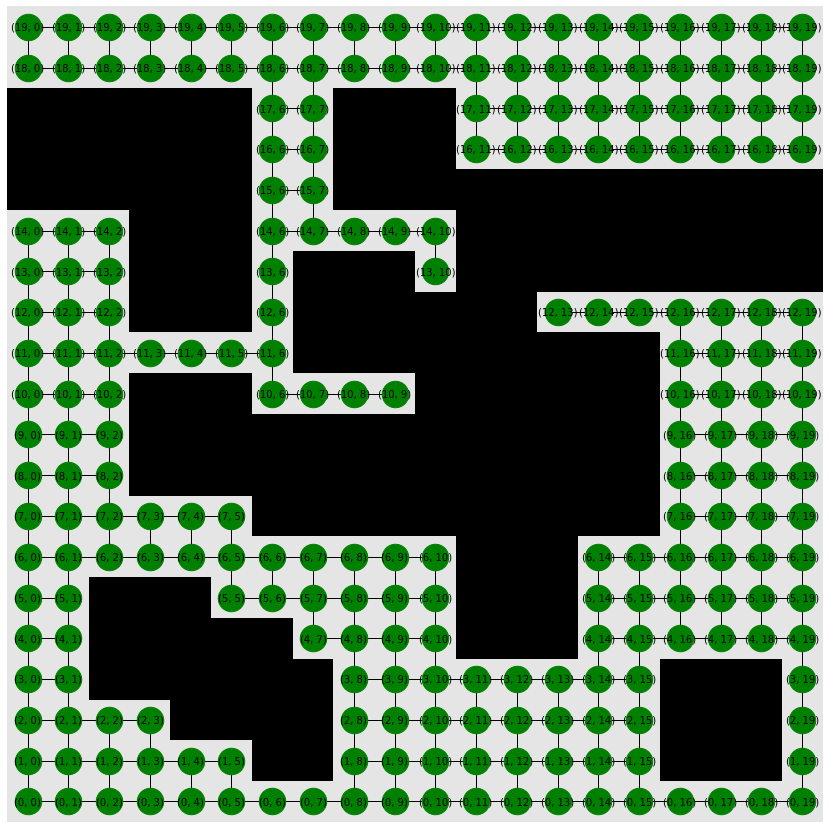

In [209]:
# Plot grid
from matplotlib import colors
def overlap_grid():
    fig, ax = plt.subplots(figsize=(15,15))
    cmap = colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, m, 1));
    ax.set_yticks(np.arange(-0.5, n, 1));
overlap_grid()

# Plot the graph
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = j, -i, where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=10, with_labels=True, node_size=700, node_color="g")